### Introduction
Welcome to the ETL project for TheLook, an e-commerce company. This project demonstrates the use of SQL and Python to extract, transform, and load (ETL) data from BigQuery public datasets into a comprehensive analysis and visualization dashboard using Tableau.

In this section of the project I will focus on data cleaning and some basic data analysis using Matplotlib and Seaborn to visualize the data and understand what we dealing with.

### Project Overview
TheLook manages various datasets essential for understanding its business operations, includ

* Users
* Order_Items
* Orders 
* Products_Inventory
* Events
* Distribution_Centerstion Centers

In [1]:
# import the libraries we will be using

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine, text
import datetime
from IPython.display import HTML

In [2]:
# import the datasets

users = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\users.csv")
order_items = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\order_items.csv")
orders = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\orders.csv")
products = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\products.csv")
inventory = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\inventory_items.csv")
events = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\events.csv")
distribution_centers = pd.read_csv(r"C:\Users\mmoki\Downloads\e-commerce\distribution_centers.csv")

### Data Cleaning and Processing 

In [3]:
pd.set_option('display.max_rows', None)  # Show all rows without truncation
pd.set_option('display.max_columns', None)  # Show all columns without truncation

In [4]:
#Convert datetime format

users['created_at'] = pd.to_datetime(users['created_at'], format='ISO8601')
order_items['created_at'] = pd.to_datetime(order_items['created_at'], format='ISO8601')
order_items['shipped_at'] = pd.to_datetime(order_items['shipped_at'], format='ISO8601')
order_items['delivered_at'] = pd.to_datetime(order_items['delivered_at'], format='ISO8601')
order_items['returned_at'] = pd.to_datetime(order_items['returned_at'], format='ISO8601')
orders['created_at'] = pd.to_datetime(orders['created_at'], format='ISO8601')
orders['returned_at'] = pd.to_datetime(orders['returned_at'], format='ISO8601')
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'], format='ISO8601')
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'], format='ISO8601')
inventory['created_at'] = pd.to_datetime(inventory['created_at'], format='ISO8601')
inventory['sold_at'] = pd.to_datetime(inventory['sold_at'], format='ISO8601')
events['created_at'] = pd.to_datetime(events['created_at'], format='ISO8601')

Alright, let's carry out some basic Exploratory Data Analysis (EDA) to gain a better understanding of our data. I'd like to use Matplotlib and Seaborn for visualizations to get a clearer picture of the data we're dealing with.

### EDA 

Lets focus on our user demographics.

C:\Users\mmoki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmoki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


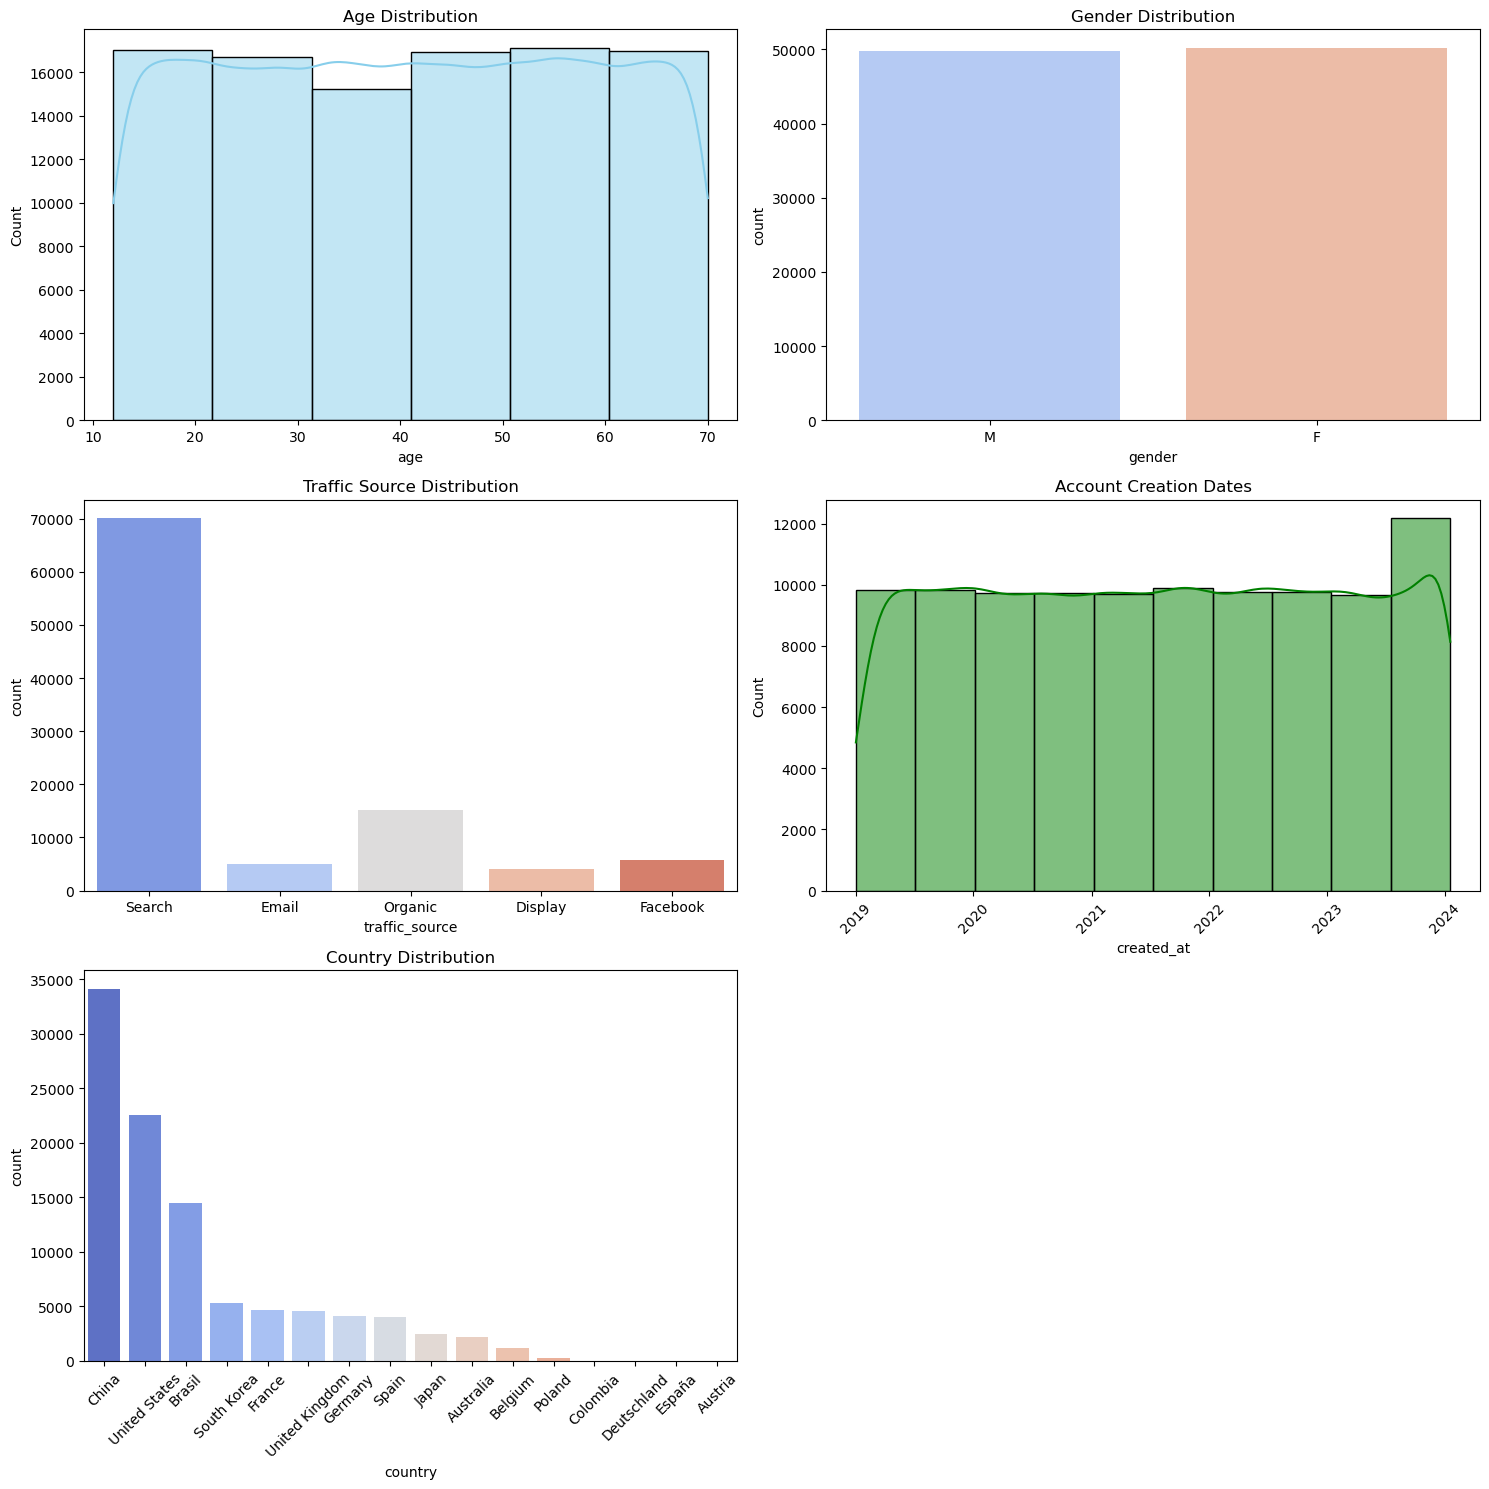

In [5]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Sort countries by their count
country_order = users['country'].value_counts().index

# Age distribution
sns.histplot(ax=axes[0, 0], data=users, x='age', kde=True, bins=6, color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Gender distribution
sns.countplot(ax=axes[0, 1], x='gender', data=users, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# Traffic source distribution
sns.countplot(ax=axes[1, 0], x='traffic_source', data=users, palette='coolwarm')
axes[1, 0].set_title('Traffic Source Distribution')

# Account creation dates
sns.histplot(ax=axes[1, 1], data=users, x='created_at', kde=True, bins=10, color='green')
axes[1, 1].set_title('Account Creation Dates')
axes[1, 1].tick_params(axis='x', rotation=45)

# Country distribution
sns.countplot(ax=axes[2, 0], x='country', data=users, order=country_order, palette='coolwarm')
axes[2, 0].set_title('Country Distribution')
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the unused subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Demographic insights result in improved business decisions, greater efficiency, and enhanced customer satisfaction. From our analysis, we observe:

* Most of our customers are from China, the United States, and Brazil.
* We can leverage successful strategies from these countries and apply them to other regions, especially Europe.
* 2023 has been a positive year, with an increase in new customer accounts.
* Search marketing is our main attraction, with Organic and Facebook also performing well.

In [6]:
orders.head(10)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaT,NaT,NaT,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaT,NaT,NaT,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaT,NaT,NaT,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaT,NaT,NaT,2
5,117,89,Cancelled,F,2023-07-31 13:25:00+00:00,NaT,NaT,NaT,1
6,143,118,Cancelled,F,2020-04-21 02:59:00+00:00,NaT,NaT,NaT,1
7,153,124,Cancelled,F,2022-07-10 16:42:00+00:00,NaT,NaT,NaT,2
8,182,147,Cancelled,F,2024-01-15 10:29:28.317841+00:00,NaT,NaT,NaT,3
9,183,148,Cancelled,F,2023-07-04 09:25:00+00:00,NaT,NaT,NaT,1


C:\Users\mmoki\AppData\Local\Temp\ipykernel_5888\1992147760.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['year_month'] = orders['created_at'].dt.to_period('M')


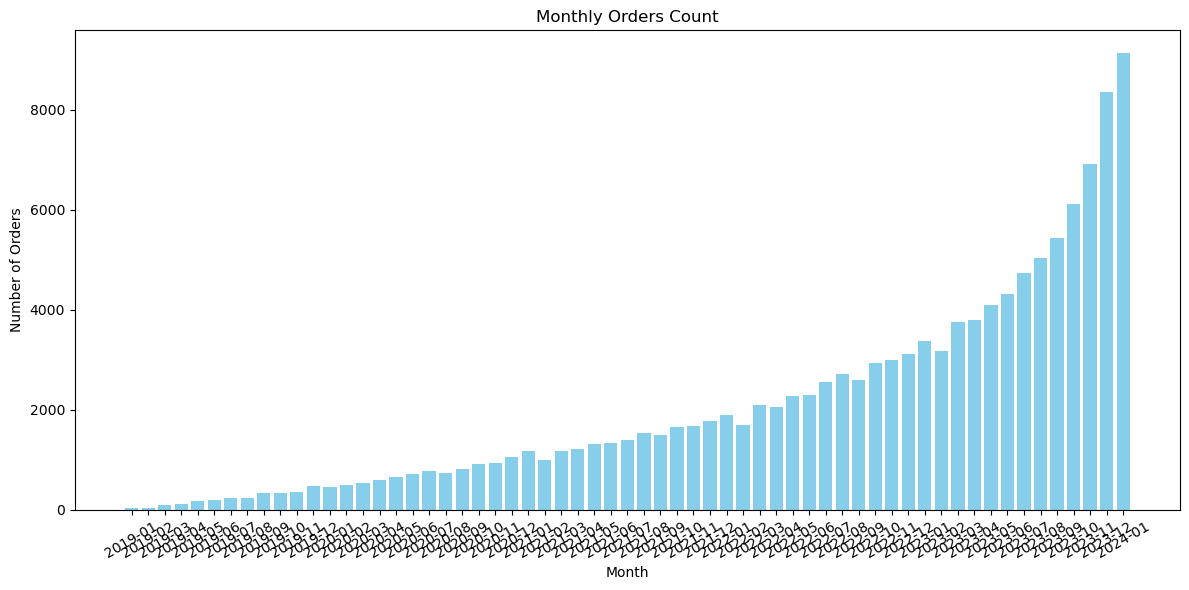

In [7]:
# Extract month and year from 'created_at'
orders['year_month'] = orders['created_at'].dt.to_period('M')

# Group by year and month and count orders
monthly_orders = orders.groupby('year_month').size().reset_index(name='order_count')

# Convert 'year_month' to string for plotting
monthly_orders['year_month'] = monthly_orders['year_month'].astype(str)
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(monthly_orders['year_month'], monthly_orders['order_count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Orders Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


We can see through the bar chart above that sales have  been on the rise and especially since the turn of 2023 the orders have spiked high.

In [8]:
order_items.head(10)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02
5,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02
6,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46+00:00,2021-11-01 17:47:00+00:00,2021-11-02 13:29:00+00:00,NaT,0.49
7,116116,80002,63821,14159,313368,Complete,2022-04-01 13:25:52+00:00,2022-03-31 05:13:00+00:00,2022-04-02 22:18:00+00:00,NaT,0.49
8,28239,19512,15553,14159,76146,Shipped,2023-10-29 08:08:40+00:00,2023-10-29 16:59:00+00:00,NaT,NaT,0.49
9,69641,47894,38312,14159,187914,Shipped,2024-01-07 23:06:39+00:00,2024-01-10 19:32:00+00:00,NaT,NaT,0.49


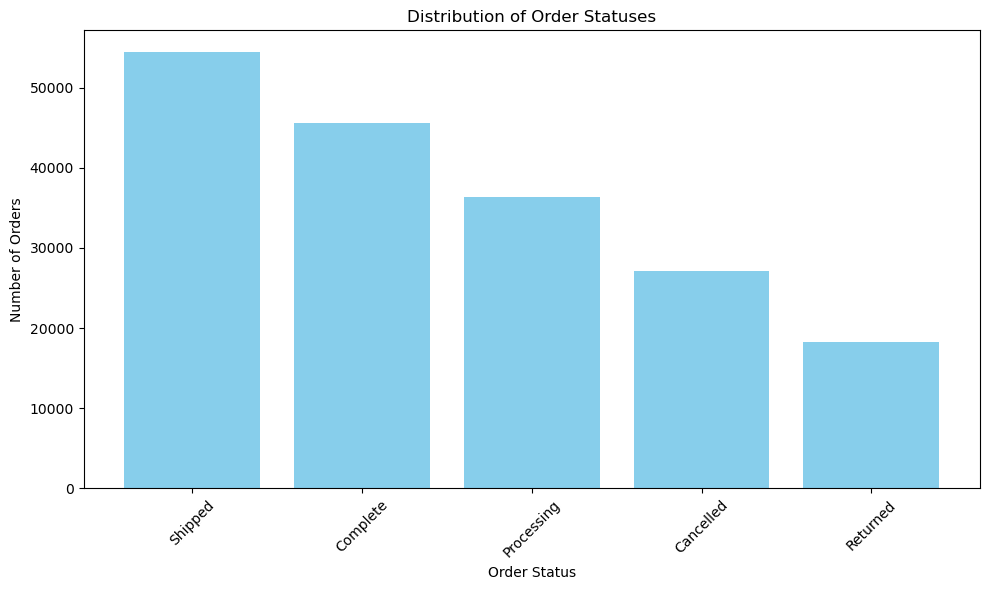

In [9]:

# Count the occurrences of each status
status_counts = order_items['status'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Statuses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart above will help us understand the status of our orders. 

Now that we have a better understanding of our datasets, we will conntinue to performm in depth analysis using SQL. I will load the data to postgresql.